In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization
import scipy #for transforming matrix from sparse to dense
from scipy.cluster.hierarchy import linkage, leaves_list #for hiearchical clustering
from scipy.spatial.distance import pdist #for hiearchical clustering

# import own functions
from utils import *

## Load data

Load the processed control subset

In [2]:
##load the anndata object
adata_path = "/home/shtiwar/PhD_Project/Mouse_scRNA_Data/GSE226824_HSPC-all_filtered.h5ad"


# trial with cospar to understand the formating of transition matrix

In [3]:
import cospar as cs
import numpy as np

In [4]:
import pandas as pd
import scipy.io as sio
import numpy as np
import os
import scanpy as sc
import matplotlib as plt

In [3]:
adata_orig = sc.read_h5ad("/home/shtiwar/cospar/tests/data/test_adata_preprocessed.h5ad")

In [60]:
%pip install wot

  Using cached wot-1.0.8.post2-py2.py3-none-any.whl (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.7/816.7 kB 13.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/fast/AG_Haghverdi/Shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/fast/AG_Haghverdi/Shashank/micromamba/envs/sc_rna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


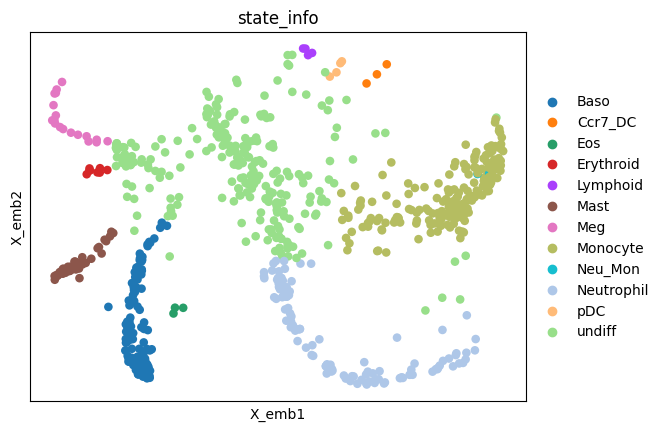

In [4]:
cs.pl.embedding(adata_orig,color="state_info")

In [4]:
cs.logging.print_version()
cs.settings.verbosity = 2  # range: 0 (error),1 (warning),2 (info),3 (hint).
cs.settings.set_figure_params(
    format="png", figsize=[4, 3.5], dpi=200, fontsize=14, pointsize=3
)

Running cospar 0.3.3 (python 3.11.6) on 2023-12-20 13:42.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [5]:
cs.settings.data_path = "data_cospar"
cs.settings.figure_path = "fig_cospar"
cs.hf.set_up_folders()

In [6]:
adata_orig = cs.datasets.hematopoiesis_subsampled()

/fast/AG_Haghverdi/Shashank/micromamba/envs/cospar/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [6]:
adata_orig.obs

,time_info,state_info,NeuMon_fate_bias,NeuMon_mask,progenitor_Ccr7_DC,progenitor_Mast,progenitor_Meg,progenitor_pDC,progenitor_Eos,progenitor_Lymphoid,progenitor_Erythroid,progenitor_Baso,progenitor_Neutrophil,progenitor_Monocyte,sp_500_idx,MLPClassifier_predicted_bias
4,6,Neutrophil,0.5,False,0,0,0,0,0,0,0,0,0,0,True,1.0
5,6,Monocyte,0.5,False,0,0,0,0,0,0,0,0,0,0,True,0.0
10,6,Baso,0.5,False,0,0,0,0,0,0,0,0,0,0,True,1.0
14,6,Monocyte,0.5,False,0,0,0,0,0,0,0,0,0,0,True,0.0
15,6,Monocyte,0.5,False,0,0,0,0,0,0,0,0,0,0,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,6,Baso,0.5,False,0,0,0,0,0,0,0,0,0,0,True,1.0
49040,6,undiff,0.5,True,0,0,0,0,0,0,0,0,0,0,True,1.0
49044,6,Neutrophil,0.5,False,0,0,0,0,0,0,0,0,0,0,True,1.0
49066,6,Neutrophil,0.5,False,0,0,0,0,0,0,0,0,0,0,True,1.0


In [7]:
adata_2 = cs.tmap.infer_Tmap_from_state_info_alone(
    adata_orig,
    initial_time_points=["4"],
    later_time_point="6",
    initialize_method="HighVar",
    HighVar_gene_pctl=85,
    max_iter_N=[10, 10],
    epsilon_converge=[0.01, 0.01],
    smooth_array=[20, 15, 10, 5],
    sparsity_threshold=0.1,
)



Step I: Generate pseudo clones where each cell has a unique barcode-----
Step II: Perform joint optimization-----
--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 4--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use the HighVar method for initialization-------
Step a: find the commonly shared highly variable genes------


/fast/AG_Haghverdi/Shashank/micromamba/envs/cospar/lib/python3.11/site-packages/cospar/tmap/map_reconstruction.py:572: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["data_des"] = [data_des_orig, data_des]
/fast/AG_Haghverdi/Shashank/micromamba/envs/cospar/lib/python3.11/site-packages/cospar/tmap/map_reconstruction.py:851: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["data_des"] = [data_des_orig, data_des]


Highly varable gene number: 1431 (t1); 1591 (t2). Common set: 798
Step b: convert the shared highly variable genes into clonal info------


 89%|█████████████████████████████████████████████████████████▊       | 710/798 [00:00<00:00, 4908.81it/s]

Total used genes=710 (no cells left)
Step c: compute the transition map based on clonal info from highly variable genes------


Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.969
Iteration 5, Use smooth_round=5
Convergence (CoSpar, iter_N=5): corr(previous_T, current_T)=0.995
Finishing initialization using HighVar, used time 19.114951610565186
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.953
Iteration 5, Use smooth_round=5
Convergence (CoSpar, iter_N=5): corr(previous_T, current_T)=0.999
Convergence (JointOpt, iter_N=1): corr(previous_T, current_T)=0.877

In [8]:
adata_2.uns

{'available_map': array([], dtype=float64),
 'clonal_time_points': array(['2', '4', '6'], dtype=object),
 'data_des': ['LARRY_sp500_ranking1', 'LARRY_sp500_ranking1_StateInfo_t*4*6'],
 'progenitor_Monocyte_colors': array(['#1f77b4'], dtype=object),
 'state_info_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a'],
       dtype=object),
 'time_ordering': array(['2', '4', '6'], dtype=object),
 'Tmap_cell_id_t1': array([1216, 1217, 1218, ..., 6115, 6116, 6117]),
 'Tmap_cell_id_t2': array([   0,    1,    2, ..., 7149, 7150, 7151]),
 'clonal_cell_id_t1': array([1216, 1217, 1218, ..., 6115, 6116, 6117]),
 'clonal_cell_id_t2': array([   0,    1,    2, ..., 7149, 7150, 7151]),
 'sp_idx': array([ True,  True,  True, ...,  True,  True,  True]),
 'transition_map': <3106x4046 sparse matrix of type '<class 'numpy.float64'>'
 	with 3158933 stored elements in Compressed Sparse Row format>,
 'HighVar

## Add x_emb to anndata

In [78]:
adata_2.uns['sp_idx']

array([ True,  True,  True, ...,  True,  True,  True])

Use pre-computed fate map


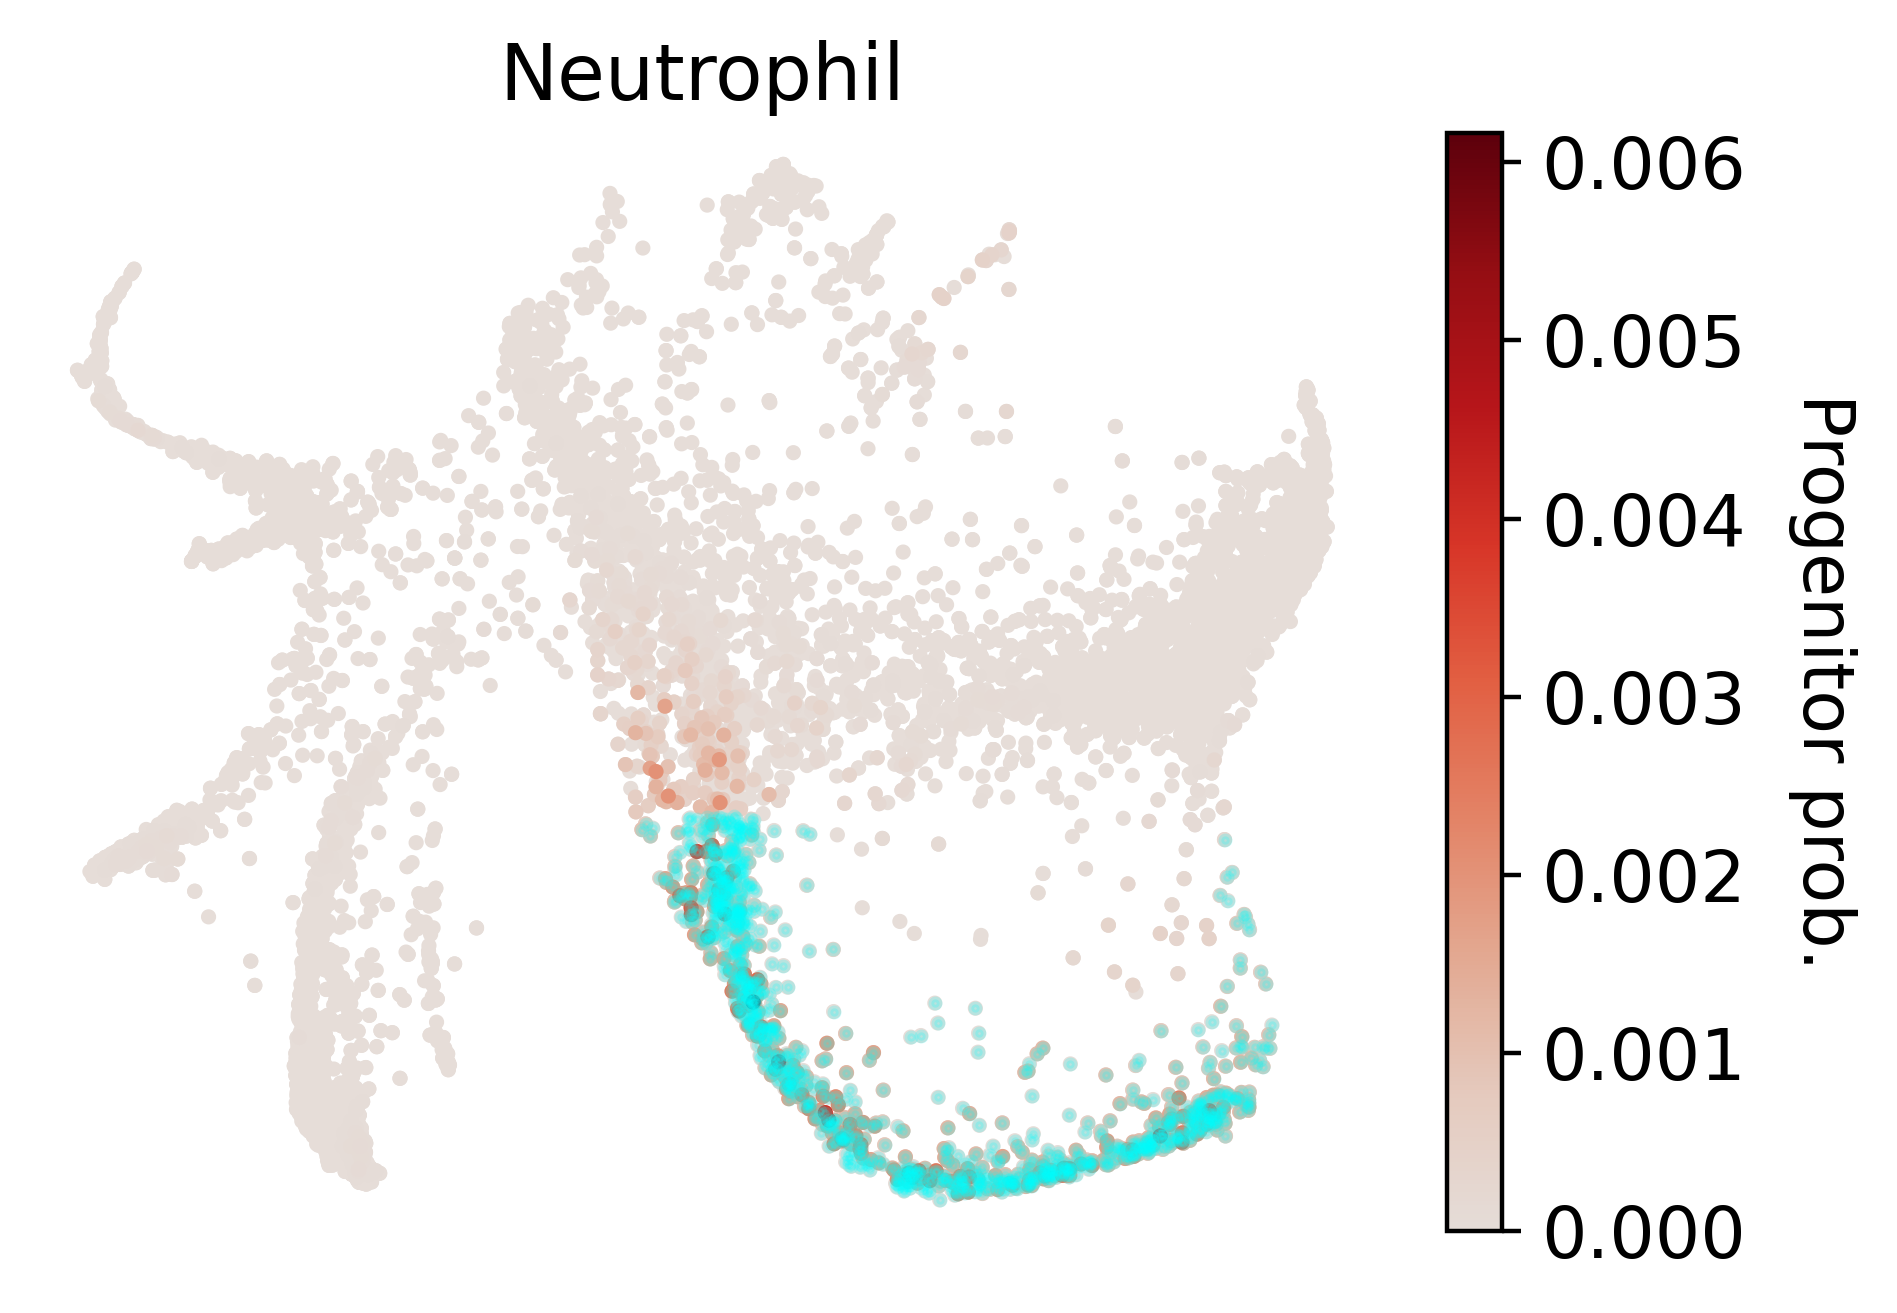

In [10]:
cs.tl.fate_map(
    adata_2,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=False,
    fate_count=False,
)
cs.pl.fate_map(
    adata_2,
    selected_fates=["Neutrophil"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

In [11]:
tmap = adata_2.uns['transition_map'].todense()

In [11]:
time_info = np.array(adata_2.obs["time_info"])
time_index_t1 = time_info == "4"
#time_index_t1 = ~time_index_t2
time_index_t2 = time_info == "6"
#### used for similarity matrix generation
Tmap_cell_id_t1 = np.nonzero(time_index_t1)[0]
Tmap_cell_id_t2 = np.nonzero(time_index_t2)[0]

adata_2.uns["Tmap_cell_id_t1"] = Tmap_cell_id_t1
adata_2.uns["Tmap_cell_id_t2"] = Tmap_cell_id_t2


In [12]:
Tmap_cell_id_t1.shape

(3106,)

In [33]:
adata_2[adata_2.obs['time_info']=="4"]

View of AnnData object with n_obs × n_vars = 3106 × 25289
    obs: 'time_info', 'state_info', 'NeuMon_fate_bias', 'NeuMon_mask', 'progenitor_Ccr7_DC', 'progenitor_Mast', 'progenitor_Meg', 'progenitor_pDC', 'progenitor_Eos', 'progenitor_Lymphoid', 'progenitor_Erythroid', 'progenitor_Baso', 'progenitor_Neutrophil', 'progenitor_Monocyte', 'sp_500_idx', 'MLPClassifier_predicted_bias', 'fate_map_transition_map_Neutrophil', 'fate_map_transition_map_Monocyte'
    uns: 'available_map', 'clonal_time_points', 'data_des', 'progenitor_Monocyte_colors', 'state_info_colors', 'time_ordering', 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'sp_idx', 'transition_map', 'HighVar_transition_map', 'fate_map_params', 'fate_potency_tmp'
    obsm: 'X_clone', 'X_emb', 'X_pca'

In [13]:
adata_2.uns['Tmap_cell_id_t2'].shape

(4046,)

In [14]:
adata_2.uns['fate_potency_tmp'].shape

(7152,)

In [12]:
adata_2.uns

{'available_map': ['transition_map', 'HighVar_transition_map'],
 'clonal_time_points': array(['2', '4', '6'], dtype=object),
 'data_des': ['LARRY_sp500_ranking1', 'LARRY_sp500_ranking1_StateInfo_t*4*6'],
 'progenitor_Monocyte_colors': array(['#1f77b4'], dtype=object),
 'state_info_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a'],
       dtype=object),
 'time_ordering': array(['2', '4', '6'], dtype=object),
 'Tmap_cell_id_t1': array([1216, 1217, 1218, ..., 6115, 6116, 6117]),
 'Tmap_cell_id_t2': array([   0,    1,    2, ..., 7149, 7150, 7151]),
 'clonal_cell_id_t1': array([1216, 1217, 1218, ..., 6115, 6116, 6117]),
 'clonal_cell_id_t2': array([   0,    1,    2, ..., 7149, 7150, 7151]),
 'sp_idx': array([ True,  True,  True, ...,  True,  True,  True]),
 'transition_map': <3106x4046 sparse matrix of type '<class 'numpy.float64'>'
 	with 3158933 stored elements in Compressed Sparse Ro

$T_{ij}\leftarrow T_{ij}/\sum_j T_{ij}$

$T_{ij} \leftarrow T_{ji}$


$P_i(\mathcal{C})=\sum_{j\in \mathcal{C}} T_{ij}$

$P_i(\mathcal{C})\leftarrow P_i(\mathcal{C})/\sum_j P_j(\mathcal{C})$

In [38]:
adata_2[adata_2.obs['time_info']=="4"].obs

,time_info,state_info,NeuMon_fate_bias,NeuMon_mask,progenitor_Ccr7_DC,progenitor_Mast,progenitor_Meg,progenitor_pDC,progenitor_Eos,progenitor_Lymphoid,progenitor_Erythroid,progenitor_Baso,progenitor_Neutrophil,progenitor_Monocyte,sp_500_idx,MLPClassifier_predicted_bias,fate_map_transition_map_Neutrophil,fate_map_transition_map_Monocyte
4406,4,Neutrophil,1.000000e+00,False,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN
4408,4,undiff,5.000000e-01,True,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN
4426,4,undiff,5.000000e-01,True,0,0,0,0,0,0,0,0,0,0,True,0.0,NaN,NaN
4430,4,undiff,5.000000e-01,True,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN
4433,4,undiff,5.000000e-01,True,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38418,4,Neutrophil,1.000000e+00,False,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN
38434,4,undiff,5.000000e-01,True,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN
38441,4,undiff,1.000000e-10,True,0,0,0,0,0,0,0,0,0,0,True,0.0,NaN,NaN
38445,4,undiff,5.000000e-01,True,0,0,0,0,0,0,0,0,0,0,True,1.0,NaN,NaN


In [16]:
def sparse_rowwise_multiply(E, a):
    """
    Multiply each row of the sparse matrix E by a scalar a

    Parameters
    ----------
    E: `np.array` or `sp.spmatrix`
    a: `np.array`
        A scalar vector.

    Returns
    -------
    Rescaled sparse matrix
    """

    nrow = E.shape[0]
    if nrow != a.shape[0]:
#        logg.error("Dimension mismatch, multiplication failed")
        return E
    else:
        w = ssp.lil_matrix((nrow, nrow))
        w.setdiag(a)
        return w * E
def analyze_selected_fates(state_info, selected_fates):
    """
    Analyze selected fates.

    We return only valid fate clusters.

    Parameters
    ----------
    selected_fates: `list`
        List of selected fate clusters.
    state_info: `list`
        The state_info vector.

    Returns
    -------
    mega_cluster_list: `list`, shape (n_fate)
        The list of names for the mega cluster. This is relevant when
        `selected_fates` has a nested structure.
    valid_fate_list: `list`, shape (n_fate)
        It is the same as selected_fates, could contain a nested list
        of fate clusters. It screens for valid fates, though.
    fate_array_flat: `list` shape (>n_fate)
        List of all selected fate clusters. It flattens the selected_fates if it contains
        nested structure, and allows only valid clusters.
    sel_index_list: `list`, shape (n_fate)
        List of selected cell indexes for each merged cluster.
    """

    state_info = np.array(state_info)
    valid_state_annot = list(set(state_info))
    if type(selected_fates) is str:
        selected_fates = [selected_fates]
    if selected_fates is None:
        selected_fates = valid_state_annot

    fate_array_flat = []  # a flatten list of cluster names
    valid_fate_list = (
        []
    )  # a list of cluster lists, each cluster list is a macro cluster
    mega_cluster_list = []  # a list of string description for the macro cluster
    sel_index_list = []
    for xx in selected_fates:
        if type(xx) is list:
            valid_fate_list.append(xx)
            des_temp = ""
            temp_idx = np.zeros(len(state_info), dtype=bool)
            for zz in xx:
                if zz in valid_state_annot:
                    fate_array_flat.append(zz)
                    if des_temp != "":
                        des_temp = des_temp + "_"

                    des_temp = des_temp + str(zz)
                    temp_idx = temp_idx | (state_info == zz)
                else:
                    raise ValueError(
                        f"{zz} is not a valid cluster name. Please select from: {valid_state_annot}"
                    )
            mega_cluster_list.append(des_temp)
            sel_index_list.append(temp_idx)
        else:
            if xx in valid_state_annot:
                valid_fate_list.append([xx])

                fate_array_flat.append(xx)
                mega_cluster_list.append(str(xx))
            else:
                raise ValueError(
                    f"{xx} is not a valid cluster name. Please select from: {valid_state_annot}"
                )
                mega_cluster_list.append("")

            temp_idx = state_info == xx
            sel_index_list.append(temp_idx)

    # exclude invalid clusters
    mega_cluster_list = np.array(mega_cluster_list)
    fate_array_flat = np.array(fate_array_flat)
    sel_index_list = np.array(sel_index_list)
    valid_idx = mega_cluster_list != ""

    return (
        mega_cluster_list[valid_idx],
        valid_fate_list,
        fate_array_flat,
        sel_index_list[valid_idx],
    )
def sparse_column_multiply(E, a):
    """
    Multiply each columns of the sparse matrix E by a scalar a

    Parameters
    ----------
    E: `np.array` or `sp.spmatrix`
    a: `np.array`
        A scalar vector.

    Returns
    -------
    Rescaled sparse matrix
    """

    ncol = E.shape[1]
    if ncol != a.shape[0]:
#        logg.error("Dimension mismatch, multiplication failed")
        return E
    else:
        w = ssp.lil_matrix((ncol, ncol))
        w.setdiag(a)
        return ssp.csr_matrix(E) * w


In [19]:
import scipy.sparse as ssp

In [20]:
transition_map = adata_2.uns['transition_map']
if not ssp.issparse(transition_map):
    transition_map = ssp.csr_matrix(transition_map).copy()

In [22]:
state_annote = adata_2.obs["state_info"]
selected_fates = ['Neutrophil']

(mega_cluster_list,
 valid_fate_list,
 fate_array_flat,
 sel_index_list,
    ) = analyze_selected_fates(state_annote, selected_fates)

In [24]:
state_annote_0 = np.array(adata_2.obs["state_info"])
state_annote_1 = state_annote_0.copy()
cell_id_t2 = adata_2.uns['Tmap_cell_id_t2']
for j1, new_cluster_id in enumerate(mega_cluster_list):
    idx = np.in1d(state_annote_0, valid_fate_list[j1])
    state_annote_1[idx] = new_cluster_id

state_annote_BW = state_annote_1[cell_id_t2]

In [25]:
resol = 10 ** (-10)
transition_map = sparse_rowwise_multiply(
    transition_map, 1 / (resol + np.sum(transition_map, 1).A.flatten())
)
fate_N = len(state_annote_BW)
N1, N2 = transition_map.shape


In [26]:
fate_map = np.zeros((N2, fate_N))

In [27]:
fate_map.shape

(4046, 4046)

In [29]:
N1,N2

(3106, 4046)

In [43]:
tmp_trans_mat = adata_2.uns['transition_map'].todense()

In [69]:
row_sum_day0_1 = np.sum(tmp_trans_mat,axis=0).tolist()

In [45]:
max_val = max(row_sum_day0_1)
idx_max = row_sum_day0_1.index(max_val)

In [70]:
# fixed bin size
data = pd.DataFrame(row_sum_day0_1)

In [75]:
tmp_trans_mat.shape

(3106, 4046)

In [ ]:
#Define the fatemap function
def fate_map(
    adata,
    source,
    df,
    selected_fates=None,
    map_backward=True,
    method="norm-sum",
    fate_count=False,
    force_run=False,
):
    """
    Compute transition probability to given fate/ancestor clusters.

    Given a transition map :math:`T_{ij}`, we explore build
    the fate map :math:`P_i(\mathcal{C})` towards a set of states annotated with
    fate :math:`\mathcal{C}` in the following ways.

    Step 1: Map normalization: :math:`T_{ij}\leftarrow T_{ij}/\sum_j T_{ij}`.

    Step 2: If `map_backward=False`, perform matrix transpose :math:`T_{ij} \leftarrow T_{ji}`.

    Step 3: aggregate fate probabiliteis within a given cluster :math:`\mathcal{C}`:

    * method='sum': :math:`P_i(\mathcal{C})=\sum_{j\in \mathcal{C}} T_{ij}`.
      This gives the intuitive meaning of fate probability.

    * method='norm-sum': We normalize the map from 'sum' method within a cluster, i.e.
      :math:`P_i(\mathcal{C})\leftarrow P_i(\mathcal{C})/\sum_j P_j(\mathcal{C})`.
      This gives the probability that a fate cluster :math:`\mathcal{C}` originates
      from an initial state :math:`i`.

    Parameters
    ----------
    adata: :class:`~anndata.AnnData` object
        Assume to contain transition maps at adata.uns.
    selected_fates: `list`, optional (default: all fates)
        List of cluster ids consistent with adata.obs['state_info'].
        It allows a nested list, where we merge clusters within
        each sub-list into a mega-fate cluster.
    source: `str`, optional (default: 'transition_map')
        The transition map to be used for plotting: {'transition_map',
        'intraclone_transition_map',...}. The actual available
        map depends on adata itself, which can be accessed at adata.uns['available_map']
    map_backward: `bool`, optional (default: True)
        If `map_backward=True`, show fate properties of initial cell states :math:`i`;
        otherwise, show progenitor properties of later cell states :math:`j`.
        This is used for building the fate map :math:`P_i(\mathcal{C})`. See :func:`.fate_map`.
    method: `str`, optional (default: 'norm-sum')
        Method to obtain the fate probability map :math:`P_i(\mathcal{C})` towards a set
        of states annotated with fate :math:`\mathcal{C}`. Available options:
        {'sum', 'norm-sum'}. See :func:`.fate_map`.
    fate_count: `bool`, optional (default: False)
        Used to determine the method for computing the fate potential of a state.
        If ture, just to count the number of possible fates; otherwise, use the Shannon entropy.
    force_run: `bool`, optional (default: False)
        Re-compute the fate map.

    Returns
    -------
    Fate map for each targeted fate cluster is updated at adata.obs[f'fate_map_{source}_{fate_name}'].
    The accompanying parameters are saved at adata.uns[f"fate_map_{source}_{fate}"]
    """
    state_annote = adata.obs["clusters"]
    (
        mega_cluster_list,
        __,
        __,
        sel_index_list,
    ) = analyze_selected_fates(state_annote, selected_fates)

    key_word = f"fate_map_{source}"
    available_choices = parse_output_choices(
        adata, key_word, where="obs", interrupt=False
    )

        # check if we need to recompute the map
    re_compute = True
    condi_0 = len(available_choices) > 0
    condi_1 = set(mega_cluster_list) <= set(available_choices)
    if condi_0 & condi_1:
        map_backward_all = set(
            [
                adata.uns["fate_map_params"][f"{source}_{x}"]["map_backward"]
                for x in mega_cluster_list
            ]
        )
        method_all = set(
            [
                adata.uns["fate_map_params"][f"{source}_{x}"]["method"]
                for x in mega_cluster_list
            ]
        )
            # check that the parameters are uniform and equals to input
        if len(map_backward_all) == 1 and len(method_all) == 1:
            condi_2 = map_backward == list(map_backward_all)[0]
            condi_3 = method == list(method_all)[0]
            if condi_2 and condi_3:
                re_compute = False
        if not (re_compute or force_run):
            print("Use pre-computed fate map")
        else:
            (
                fate_map,
                mega_cluster_list,
                relative_bias,
                expected_prob,
                valid_fate_list,
                sel_index_list,
                fate_entropy,
            ) = compute_fate_probability_map(
                adata,
                used_Tmap,
                df,
                selected_fates=selected_fates,
                map_backward=map_backward,
                method=method,
                fate_count=fate_count,
            )

            if map_backward:
                cell_id_t1 = np.array(list(df.index))
                cell_id_t1 = cell_id_t1.astype(int)
                #cell_id_t1 = adata.uns["Tmap_cell_id_t1"]
            else:
                cell_id_t1 = np.array(list(df.columns))
                cell_id_t1 = cell_id_t1.astype(int)
                #cell_id_t1 = adata.uns["Tmap_cell_id_t2"]

            if "fate_map_params" not in adata.uns.keys():
                adata.uns[f"fate_map_params"] = {}

            if len(mega_cluster_list) == 0:
                print("No cells selected. Computation aborted!")
            else:
                for j, fate in enumerate(mega_cluster_list):
                    temp_map = np.zeros(adata.shape[0]) + np.nan
                    temp_map[cell_id_t1] = fate_map[:, j]
                    adata.obs[f"fate_map_{source}_{fate}"] = temp_map
                    adata.uns[f"fate_map_params"][f"{source}_{fate}"] = {
                        "map_backward": map_backward,
                        "method": method,
                    }
                    print(f"Results saved at adata.obs['fate_map_{source}_{fate}']")

                temp_map = np.zeros(adata.shape[0]) + np.nan
                temp_map[cell_id_t1] = fate_entropy
                adata.uns[f"fate_potency_tmp"] = temp_map

In [ ]:
def compute_fate_probability_map(
    adata,
    used_Tmap,
    df,
    selected_fates=None,
    map_backward=True,
    method="norm-sum",
    fate_count=True,
):
    """
    Compute fate map and the relative bias compared to the expectation.

    `selected_fates` could contain a nested list of clusters. If so, we combine each sub-list
    into a mega-fate cluster and compute the fate map correspondingly.

    The relative bias is obtained by comparing the fate_prob with the
    expected_prob from the relative size of the targeted cluster. It ranges from [0,1],
    with 0.5 being the point that the fate_prob agrees with expected_prob.
    1 is extremely biased.

    Parameters
    ----------
    adata: :class:`~anndata.AnnData` object
        Assume to contain transition maps at adata.uns.
    selected_fates: `list`, optional (default: all)
        List of targeted clusters, consistent with adata.obs['state_info'].
        If set to be None, use all fate clusters in adata.obs['state_info'].
    used_Tmap: `str`
        The transition map to be used for plotting: {'transition_map',
        'intraclone_transition_map','weinreb_transition_map','naive_transition_map',
        'OT_transition_map','HighVar_transition_map'}. The actual available
        map depends on adata itself, which can be accessed at adata.uns['available_map']
    map_backward: `bool`, optional (default: True)
        If `map_backward=True`, compute for initial cell states (rows of Tmap, at t1);
        else, compute for later cell states (columns of Tmap, at t2)
    method: `str`, optional (default: 'norm-sum')
        Method to aggregate the transition probability within a cluster. Available options: {'sum','mean','max','norm-sum'},
        which computes the sum, mean, or max of transition probability within a cluster as the final fate probability.
    fate_count: `bool`, optional (default: True)
        Used to determine the method for computing the fate potential of a state.
        If ture, jus to count the number of possible fates; otherwise, use the Shannon entropy.

    Returns
    -------
    Store `fate_array`, `fate_map`, `fate_entropy` in adata.uns['fate_map'].

    fate_map: `np.array`, shape (n_cell, n_fate)
        n_fate is the number of mega cluster, equals len(selected_fates).
    mega_cluster_list: `list`, shape (n_fate)
        The list of names for the mega cluster. This is relevant when
        `selected_fates` has a nested structure.
    relative_bias: `np.array`, shape (n_cell, n_fate)
    expected_prob: `np.array`, shape (n_fate,)
    valid_fate_list: `list`, shape (n_fate)
        It is the same as selected_fates, could contain a nested list
        of fate clusters. It screens for valid fates, though.
    """

    if map_backward:
        #cell_id_t2 = adata.uns["Tmap_cell_id_t2"]
        cell_id_t2 = np.array(list(df.columns))
        cell_id_t2 = cell_id_t2.astype(int)
        #Tmap = source
        
    else:
        #cell_id_t2 = adata.uns["Tmap_cell_id_t1"]
        cell_id_t2 = np.array(list(df.columns))
        cell_id_t2 = cell_id_t2.astype(int)
        #Tmap = source
    state_annote = adata.obs["clusters"]
    if selected_fates is None:
        selected_fates = list(set(state_annote))
    (
        mega_cluster_list,
        valid_fate_list,
        fate_array_flat,
        sel_index_list,
    ) = analyze_selected_fates(state_annote, selected_fates)

    state_annote_0 = np.array(adata.obs["clusters"])
    if not map_backward:
        cell_id_t1 = np.array(list(df.index))
        cell_id_t1 = cell_id_t1.astype(int)
        cell_id_t2 = np.array(list(df.columns))
        cell_id_t2 = cell_id_t2.astype(int)
        #Tmap = source
    else:
        cell_id_t2 = np.array(list(df.index))
        cell_id_t2 = cell_id_t2.astype(int)
        cell_id_t1 = np.array(list(df.columns))
        cell_id_t1 = cell_id_t1.astype(int)
        #Tmap = source.T
    '''
    if map_backward:
        cell_id_t1 = adata.uns["Tmap_cell_id_t1"]
        cell_id_t2 = adata.uns["Tmap_cell_id_t2"]

    else:
        cell_id_t2 = adata.uns["Tmap_cell_id_t1"]
        cell_id_t1 = adata.uns["Tmap_cell_id_t2"]
    '''
    x_emb = adata.obsm["X_emb"][:, 0]
    y_emb = adata.obsm["X_emb"][:, 1]
    #data_des = adata.uns["data_des"][-1]

    state_annote_1 = state_annote_0.copy()
    for j1, new_cluster_id in enumerate(mega_cluster_list):
        idx = np.in1d(state_annote_0, valid_fate_list[j1])
        state_annote_1[idx] = new_cluster_id

    state_annote_BW = state_annote_1[cell_id_t2]

    #if used_Tmap in adata.uns["available_map"]:
    used_map = used_Tmap

    fate_map, fate_entropy = compute_state_potential(
        used_map,
        state_annote_BW,
        mega_cluster_list,
        fate_count=fate_count,
        map_backward=map_backward,
        method=method)
    # Note: we compute relative_bias (normalze against cluster size). This is no longer in active use
    N_macro = len(valid_fate_list)
    relative_bias = np.zeros((fate_map.shape[0], N_macro))
    expected_prob = np.zeros(N_macro)
    for jj in range(N_macro):
        for yy in valid_fate_list[jj]:
            expected_prob[jj] = expected_prob[jj] + np.sum(
                state_annote[cell_id_t2] == yy
            ) / len(cell_id_t2)

        # transformation, this is useful only when the method =='sum'
        temp_idx = fate_map[:, jj] < expected_prob[jj]
        temp_diff = fate_map[:, jj] - expected_prob[jj]
        relative_bias[temp_idx, jj] = temp_diff[temp_idx] / expected_prob[jj]
        relative_bias[~temp_idx, jj] = temp_diff[~temp_idx] / (1 - expected_prob[jj])

        relative_bias[:, jj] = (
            relative_bias[:, jj] + 1
        ) / 2  # rescale to the range [0,1]

    return (
        fate_map,
        mega_cluster_list,
        relative_bias,
        expected_prob,
        valid_fate_list,
        sel_index_list,
        fate_entropy,
    )

In [ ]:
def mapout_trajectories(
    transition_map, state_prob_t2, threshold=0.1, cell_id_t1=[], cell_id_t2=[]
):
    """
    Map out the ancestor probability for a given later state distribution.

    We assume that transition_map is a normalized probabilistic map from
    t1-state to t2-states. Given a distribution of states at t2, we infer the initial state distribution.

    Although it is designed to map trajectories backward, one can simply
    transpose the Tmap, and swap everything related to t1 and t2, to map forward.

    Parameters
    ----------
    transition_map: `np.array` (also accept `sp.spsparse`), shape (n_t1, n_t2)
        A transition matrix that is properly normalized.
    state_prob_t2: `np.array`, shape (n_t2,)
        A continuous-valued vector that defines the probability of the final states.
    threshold: `float`, optional (default: 0.1), range ([0,1])
        We set to zero entries < threshold * max(state_prob_t1).
    cell_id_t1: `np.array` (also accept `list`)
        The id array for cell states at t1 in the full space
    cell_id_t2: `np.array` (also accept `list`)
        The id array for cell states at t2 in the full space

    Returns
    -------
    state_prob_t1_truc: `np.array`, shape (n_t1,)
        The fate probability of each t1-cell state to enter the soft
        t2-cluster as defined by state_prob_t2.
    """

    ########## We assume that the transition_map has been properly normalized.
    # if not ssp.issparse(transition_map): transition_map=ssp.csr_matrix(transition_map).copy()
    # resol=10**(-10)
    # transition_map=sparse_rowwise_multiply(transition_map,1/(resol+np.sum(transition_map,1).A.flatten()))

    N1, N2 = transition_map.shape
    if (
        len(cell_id_t1) == 0 and N1 == N2
    ):  # cell_id_t1 and cell_id_t2 live in the same state space
        state_prob_t1 = transition_map.dot(state_prob_t2)
        state_prob_t1_idx = state_prob_t1 > threshold * np.max(state_prob_t1)
        state_prob_t1_id = np.nonzero(state_prob_t1_idx)[0]

        state_prob_t1_truc = np.zeros(len(state_prob_t1))
        state_prob_t1_truc[state_prob_t1_id] = state_prob_t1[state_prob_t1_id]
    else:
        # both cell_id_t1 and cell_id_t2 are id's in the full space
        # selected_cell_id is also in the full space
        cell_id_t1 = np.array(cell_id_t1)
        cell_id_t2 = np.array(cell_id_t2)
        state_prob_t2_subspace = state_prob_t2[cell_id_t2]

        state_prob_t1 = transition_map.dot(state_prob_t2_subspace)
        state_prob_t1_idx = state_prob_t1 > threshold * np.max(state_prob_t1)
        state_prob_t1_id = np.nonzero(state_prob_t1_idx)[0]  # id in t1 subspace
        # state_prob_t1_truc=state_prob_t1[state_prob_t1_id]
        state_prob_t1_truc = np.zeros(len(state_prob_t1))
        state_prob_t1_truc[state_prob_t1_id] = state_prob_t1[state_prob_t1_id]

    return state_prob_t1_truc

In [ ]:
def compute_state_potential(
    transition_map,
    state_annote,
    fate_array,
    fate_count=False,
    map_backward=True,
    method="sum",
):
    """
    Compute state probability towards/from given clusters

    Before any calculation, we row-normalize the transition map.
    If map_backward=True, compute the fate map towards given
    clusters. Otherwise, compute the ancestor map, the probabilities
    of a state to originate from given clusters.

    Parameters
    ----------
    transition_map: `sp.spmatrix` (also accept `np.array`)
        Transition map of the shape: (n_t1_cells, n_t2_cells).
    state_annote: `np.array`
        Annotation for each cell state.
    fate_array: `np.array` or `list`
        List of targeted clusters, consistent with state_annote.
    fate_count: `bool`, optional (default: False)
        Relevant for compute the fate_entropy. If true, just count
        the number of possible (Prob>0) fate outcomes for each state;
        otherwise, compute the shannon entropy of fate outcome for each state
    map_backward: `bool`, optional (default: True)
        If `map_backward=True`, compute for initial cell states (rows of Tmap, at t1);
        else, for later cell states (columns of Tmap, at t2)
    method: `str`, optional (default: 'sum')
        Method to aggregate the transition probability within a cluster. Available options: {'sum','mean','max','norm-sum'},
        which computes the sum, mean, or max of transition probability within a cluster as the final fate probability.

    Returns
    -------
    fate_map: `np.array`, shape (n_cells, n_fates)
        A matrix of fate potential for each state
    fate_entropy: `np.array`, shape (n_fates,)
        A vector of fate entropy for each state
    """

    if not ssp.issparse(transition_map):
        transition_map = ssp.csr_matrix(transition_map).copy()
    resol = 10 ** (-10)
    transition_map = sparse_rowwise_multiply(
        transition_map, 1 / (resol + np.sum(transition_map, 1).A.flatten())
    )
    fate_N = len(fate_array)
    N1, N2 = transition_map.shape

    # logg.info(f"Use the method={method} to compute differentiation bias")

    if map_backward:
        idx_array = np.zeros((N2, fate_N), dtype=bool)
        for k in range(fate_N):
            idx_array[:, k] = state_annote == fate_array[k]

        fate_map = np.zeros((N1, fate_N))
        fate_entropy = np.zeros(N1)

        for k in range(fate_N):
            if method == "max":
                fate_map[:, k] = np.max(
                    transition_map[:, idx_array[:, k]], 1
                ).A.flatten()
            elif method == "mean":
                fate_map[:, k] = np.mean(
                    transition_map[:, idx_array[:, k]], 1
                ).A.flatten()
            else:  # just perform summation
                fate_map[:, k] = np.sum(
                    transition_map[:, idx_array[:, k]], 1
                ).A.flatten()

        # rescale. After this, the fate map value spreads between [0,1]. Otherwise, they can be tiny.
        if (method != "sum") and (method != "norm-sum"):
            fate_map = fate_map / np.max(fate_map)
        elif method == "norm-sum":
            # perform normalization of the fate map. This works only if there are more than two fates
            if fate_N > 1:
                # logg.info('conditional method: perform column normalization')
                fate_map = sparse_column_multiply(
                    fate_map, 1 / (resol + np.sum(fate_map, 0).flatten())
                ).A
                fate_map = fate_map / np.max(fate_map)

        for j in range(N1):
            ### compute the "fate-entropy" for each state
            if fate_count:
                p0 = fate_map[j, :]
                fate_entropy[j] = np.sum(p0 > 0)
            else:
                p0 = fate_map[j, :]
                p0 = p0 / (resol + np.sum(p0)) + resol
                for k in range(fate_N):
                    fate_entropy[j] = fate_entropy[j] - p0[k] * np.log(p0[k])

    ### forward map
    else:
        idx_array = np.zeros((N1, fate_N), dtype=bool)
        for k in range(fate_N):
            idx_array[:, k] = state_annote == fate_array[k]

        fate_map = np.zeros((N2, fate_N))
        fate_entropy = np.zeros(N2)

        for k in range(fate_N):
            if method == "max":
                fate_map[:, k] = np.max(
                    transition_map[idx_array[:, k], :], 0
                ).A.flatten()
            elif method == "mean":
                fate_map[:, k] = np.mean(
                    transition_map[idx_array[:, k], :], 0
                ).A.flatten()
            else:
                fate_map[:, k] = np.sum(
                    transition_map[idx_array[:, k], :], 0
                ).A.flatten()

        # rescale. After this, the fate map value spreads between [0,1]. Otherwise, they can be tiny.
        if (method != "sum") and (method != "norm-sum"):
            fate_map = fate_map / np.max(fate_map)
        elif method == "norm-sum":
            # perform normalization of the fate map. This works only if there are more than two fates
            if fate_N > 1:
                # logg.info('conditional method: perform column normalization')
                fate_map = sparse_column_multiply(
                    fate_map, 1 / (resol + np.sum(fate_map, 0).flatten())
                ).A

        for j in range(N1):

            ### compute the "fate-entropy" for each state
            if fate_count:
                p0 = fate_map[j, :]
                fate_entropy[j] = np.sum(p0 > 0)
            else:
                p0 = fate_map[j, :]
                p0 = p0 / (resol + np.sum(p0)) + resol
                for k in range(fate_N):
                    fate_entropy[j] = fate_entropy[j] - p0[k] * np.log(p0[k])

    return fate_map, fate_entropy

In [37]:
## Helper function
def analyze_selected_fates(state_info, selected_fates):
    """
    Analyze selected fates.

    We return only valid fate clusters.

    Parameters
    ----------
    selected_fates: `list`
        List of selected fate clusters.
    state_info: `list`
        The state_info vector.

    Returns
    -------
    mega_cluster_list: `list`, shape (n_fate)
        The list of names for the mega cluster. This is relevant when
        `selected_fates` has a nested structure.
    valid_fate_list: `list`, shape (n_fate)
        It is the same as selected_fates, could contain a nested list
        of fate clusters. It screens for valid fates, though.
    fate_array_flat: `list` shape (>n_fate)
        List of all selected fate clusters. It flattens the selected_fates if it contains
        nested structure, and allows only valid clusters.
    sel_index_list: `list`, shape (n_fate)
        List of selected cell indexes for each merged cluster.
    """

    state_info = np.array(state_info)
    valid_state_annot = list(set(state_info))
    if type(selected_fates) is str:
        selected_fates = [selected_fates]
    if selected_fates is None:
        selected_fates = valid_state_annot

    fate_array_flat = []  # a flatten list of cluster names
    valid_fate_list = (
        []
    )  # a list of cluster lists, each cluster list is a macro cluster
    mega_cluster_list = []  # a list of string description for the macro cluster
    sel_index_list = []
    for xx in selected_fates:
        if type(xx) is list:
            valid_fate_list.append(xx)
            des_temp = ""
            temp_idx = np.zeros(len(state_info), dtype=bool)
            for zz in xx:
                if zz in valid_state_annot:
                    fate_array_flat.append(zz)
                    if des_temp != "":
                        des_temp = des_temp + "_"

                    des_temp = des_temp + str(zz)
                    temp_idx = temp_idx | (state_info == zz)
                else:
                    raise ValueError(
                        f"{zz} is not a valid cluster name. Please select from: {valid_state_annot}"
                    )
            mega_cluster_list.append(des_temp)
            sel_index_list.append(temp_idx)
        else:
            if xx in valid_state_annot:
                valid_fate_list.append([xx])

                fate_array_flat.append(xx)
                mega_cluster_list.append(str(xx))
            else:
                raise ValueError(
                    f"{xx} is not a valid cluster name. Please select from: {valid_state_annot}"
                )
                mega_cluster_list.append("")

            temp_idx = state_info == xx
            sel_index_list.append(temp_idx)

    # exclude invalid clusters
    mega_cluster_list = np.array(mega_cluster_list)
    fate_array_flat = np.array(fate_array_flat)
    sel_index_list = np.array(sel_index_list)
    valid_idx = mega_cluster_list != ""

    return (
        mega_cluster_list[valid_idx],
        valid_fate_list,
        fate_array_flat,
        sel_index_list[valid_idx],
    )
def sparse_rowwise_multiply(E, a):
    """
    Multiply each row of the sparse matrix E by a scalar a

    Parameters
    ----------
    E: `np.array` or `sp.spmatrix`
    a: `np.array`
        A scalar vector.

    Returns
    -------
    Rescaled sparse matrix
    """

    nrow = E.shape[0]
    if nrow != a.shape[0]:
#        logg.error("Dimension mismatch, multiplication failed")
        return E
    else:
        w = ssp.lil_matrix((nrow, nrow))
        w.setdiag(a)
        return w * E


def sparse_column_multiply(E, a):
    """
    Multiply each columns of the sparse matrix E by a scalar a

    Parameters
    ----------
    E: `np.array` or `sp.spmatrix`
    a: `np.array`
        A scalar vector.

    Returns
    -------
    Rescaled sparse matrix
    """

    ncol = E.shape[1]
    if ncol != a.shape[0]:
#        logg.error("Dimension mismatch, multiplication failed")
        return E
    else:
        w = ssp.lil_matrix((ncol, ncol))
        w.setdiag(a)
        return ssp.csr_matrix(E) * w

def parse_output_choices(adata, key_word, where="obs", interrupt=True):
    if where == "obs":
        raw_choices = [xx for xx in adata.obs.keys() if xx.startswith(f"{key_word}")]
    else:
        raw_choices = [xx for xx in adata.uns.keys() if xx.startswith(f"{key_word}")]

    if (interrupt) and (len(raw_choices) == 0):
        raise ValueError(
            f"{key_word} has not been computed yet. Please run the counterpart function at cs.tl.XXX using the appropriate source name."
        )

    available_choices = []
    for xx in raw_choices:
        y = xx.split(f"{key_word}")[1]
        if y.startswith("_"):
            y = y[1:]
        available_choices.append(y)

    return available_choices


In [34]:
adata_2.uns["fate_map_params"]["transition_map_Monocyte"]["map_backward"]

True

In [50]:
adata_2.uns

{'available_map': ['transition_map', 'HighVar_transition_map'],
 'clonal_time_points': array(['2', '4', '6'], dtype=object),
 'data_des': ['LARRY_sp500_ranking1', 'LARRY_sp500_ranking1_StateInfo_t*4*6'],
 'progenitor_Monocyte_colors': array(['#1f77b4'], dtype=object),
 'state_info_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
        '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a'],
       dtype=object),
 'time_ordering': array(['2', '4', '6'], dtype=object),
 'Tmap_cell_id_t1': array([1216, 1217, 1218, ..., 6115, 6116, 6117]),
 'Tmap_cell_id_t2': array([   0,    1,    2, ..., 7149, 7150, 7151]),
 'clonal_cell_id_t1': array([1216, 1217, 1218, ..., 6115, 6116, 6117]),
 'clonal_cell_id_t2': array([   0,    1,    2, ..., 7149, 7150, 7151]),
 'sp_idx': array([ True,  True,  True, ...,  True,  True,  True]),
 'transition_map': <3106x4046 sparse matrix of type '<class 'numpy.float64'>'
 	with 3158933 stored elements in Compressed Sparse Ro

In [48]:
len(adata_2.obs)

7152